In [1]:
import pandas as pd

# Load CSV and parse publish time
df = pd.read_csv('youtube_channel_real.csv')

# Inspect structure and summary
print(df.head())
print(df.info())
print(df.describe())



   ID  Video Duration   Video Publish Time  Days Since Publish  Day  Month  \
0   0           201.0  2016-06-02 00:00:00                   0    2      6   
1   1           391.0  2016-06-10 00:00:00                   8   10      6   
2   2           133.0  2016-06-14 00:00:00                   4   14      6   
3   3            14.0  2016-06-29 00:00:00                  15   29      6   
4   4            45.0  2016-07-01 00:00:00                   2    1      7   

   Year Day of Week  Revenue per 1000 Views (USD)  \
0  2016    Thursday                         0.024   
1  2016      Friday                         0.056   
2  2016     Tuesday                         0.014   
3  2016   Wednesday                         0.004   
4  2016      Friday                         0.000   

   Monetized Playbacks (Estimate)  ...  Watched (Not Skipped) (%)  \
0                           723.0  ...                        0.0   
1                           727.0  ...                        0.0   
2    

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  364 non-null    int64  
 1   Video Duration                      364 non-null    float64
 2   Video Publish Time                  364 non-null    object 
 3   Days Since Publish                  364 non-null    int64  
 4   Day                                 364 non-null    int64  
 5   Month                               364 non-null    int64  
 6   Year                                364 non-null    int64  
 7   Day of Week                         364 non-null    object 
 8   Revenue per 1000 Views (USD)        364 non-null    float64
 9   Monetized Playbacks (Estimate)      364 non-null    float64
 10  Playback-Based CPM (USD)            364 non-null    float64
 11  CPM (USD)                           364 non-n

In [4]:
df.isnull().sum()



df.head()

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


In [5]:
df= df.dropna()

In [6]:
df['Video Publish Time'] = pd.to_datetime(df['Video Publish Time'])

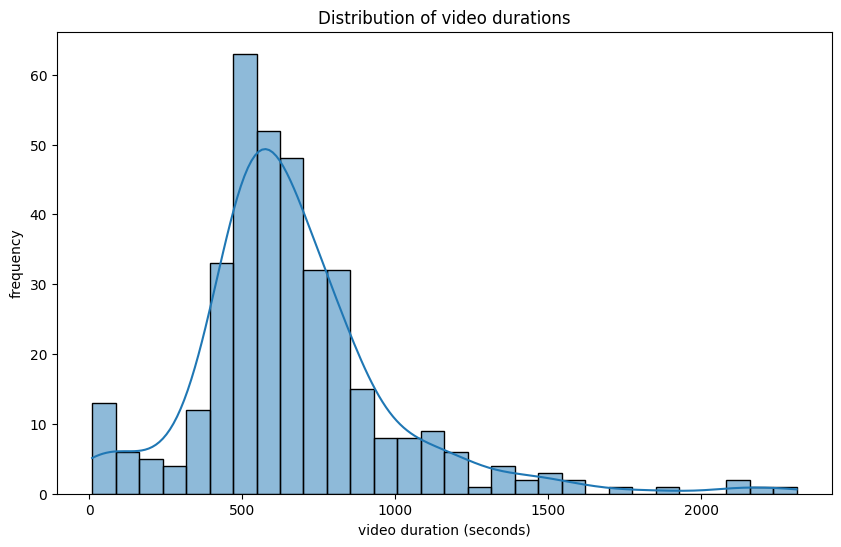

In [7]:
#Distribution of video duration
plt.figure(figsize=(10,6))
sns.histplot(df['Video Duration'],bins=30,kde=True)
plt.title('Distribution of video durations')
plt.xlabel('video duration (seconds)')
plt.ylabel('frequency')
plt.show()

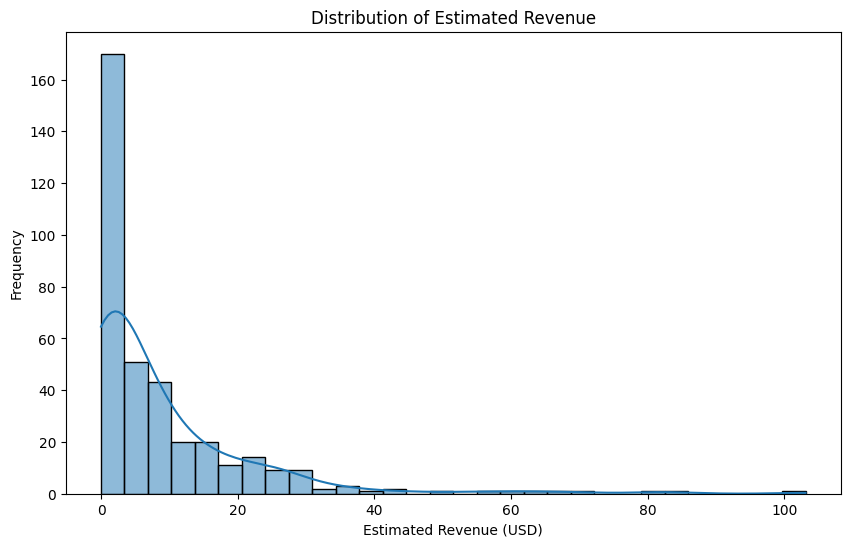

In [8]:
# Revenue distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Estimated Revenue (USD)'], bins=30, kde=True)
plt.title('Distribution of Estimated Revenue')
plt.xlabel('Estimated Revenue (USD)')
plt.ylabel('Frequency')
plt.show()

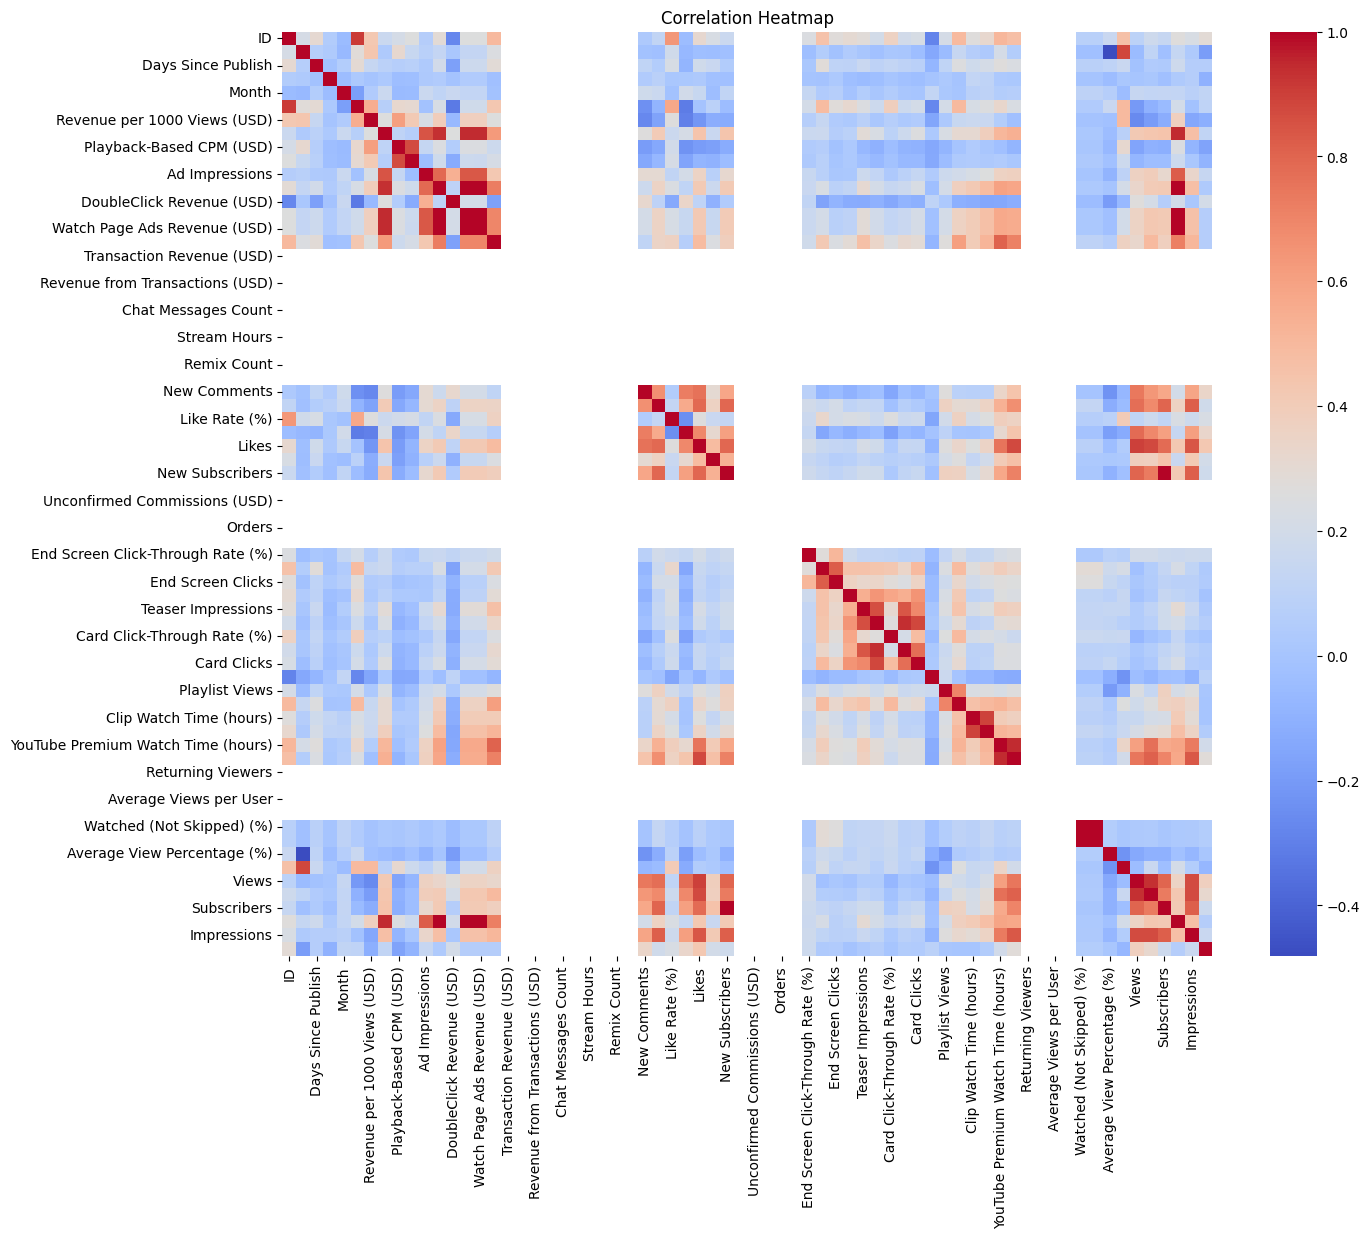

In [9]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define features and target variable
X = numeric_df.drop(columns=['Estimated Revenue (USD)'])
y = numeric_df['Estimated Revenue (USD)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the prediction accuracy
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.45593992214488205)

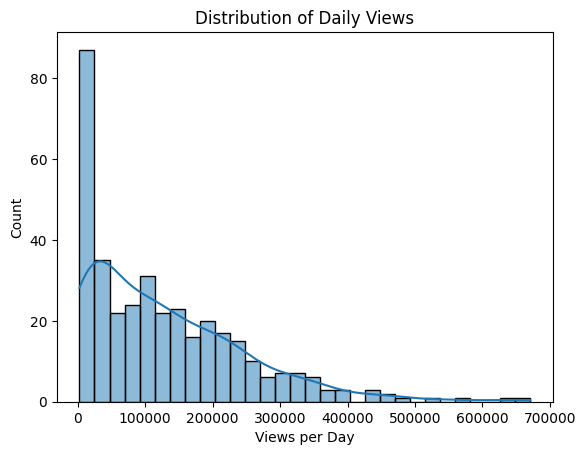

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of daily views
sns.histplot(df['Views'], bins=30, kde=True)
plt.title('Distribution of Daily Views')
plt.xlabel('Views per Day')
plt.show()






#Remark: Histograms reveal skewness; heavy right tails often call for log transformations

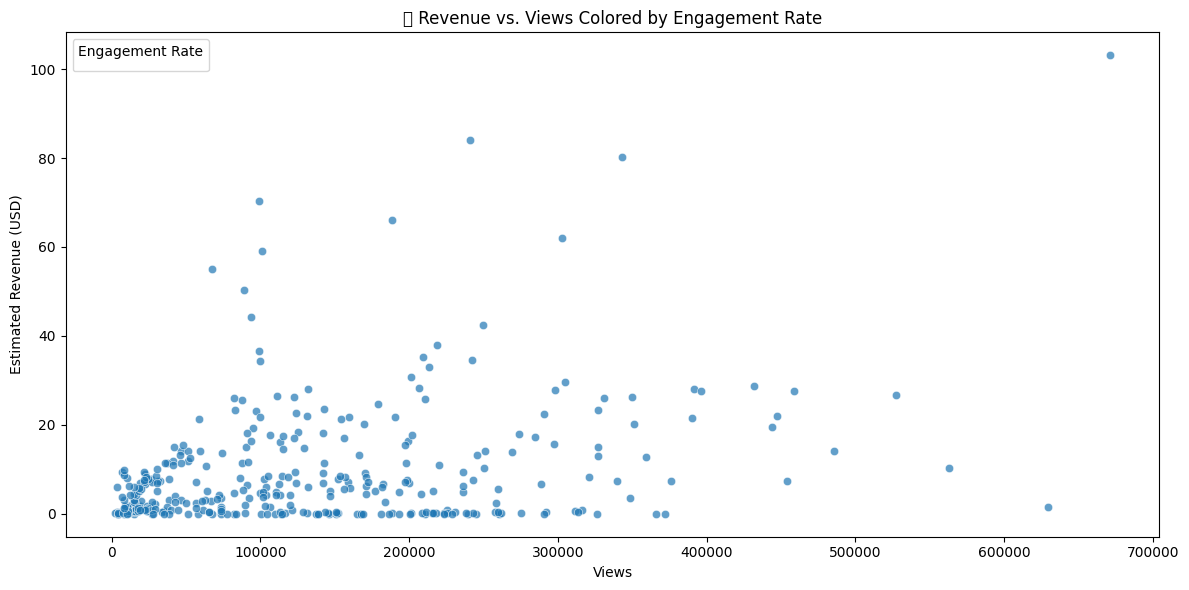

In [12]:
if {'Views', 'Estimated Revenue (USD)'}.issubset(df.columns):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x='Views', y='Estimated Revenue (USD)', palette='coolwarm', alpha=0.7)
    plt.title('📈 Revenue vs. Views Colored by Engagement Rate')
    plt.xlabel('Views')
    plt.ylabel('Estimated Revenue (USD)')
    plt.legend(title='Engagement Rate')
    plt.tight_layout()
    plt.show()

In [ ]:
# Aggregate daily total revenue
daily_rev = (
    df
    .set_index('video_publish_time')
    .resample('D')['estimated_adsense_revenue_usd']
    .sum()
    .reset_index()
)

sns.lineplot(x='video_publish_time', y='estimated_adsense_revenue_usd', data=daily_rev)
plt.title('Daily AdSense Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total AdSense Revenue')
plt.show()


In [ ]:
import numpy as np

# Log transform
df['log_views'] = np.log1p(df['Views'])

# Long video flag
median_dur = df['video_duration'].median()
df['is_long'] = (df['video_duration'] > median_dur).astype(int)

# Publish hour and weekend flag
df['publish_hour'] = df['video_publish_time'].dt.hour
df['is_weekend'] = df['video_publish_time'].dt.weekday.isin([5,6]).astype(int)


In [ ]:
sns.scatterplot(
    x='Views',
    y='estimated_adsense_revenue_usd',
    data=df
)
plt.title('Views vs AdSense Revenue')
plt.xlabel('Views')
plt.ylabel('AdSense Revenue (USD)')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, preds))


Mean Absolute Error: 0.2569857534246579


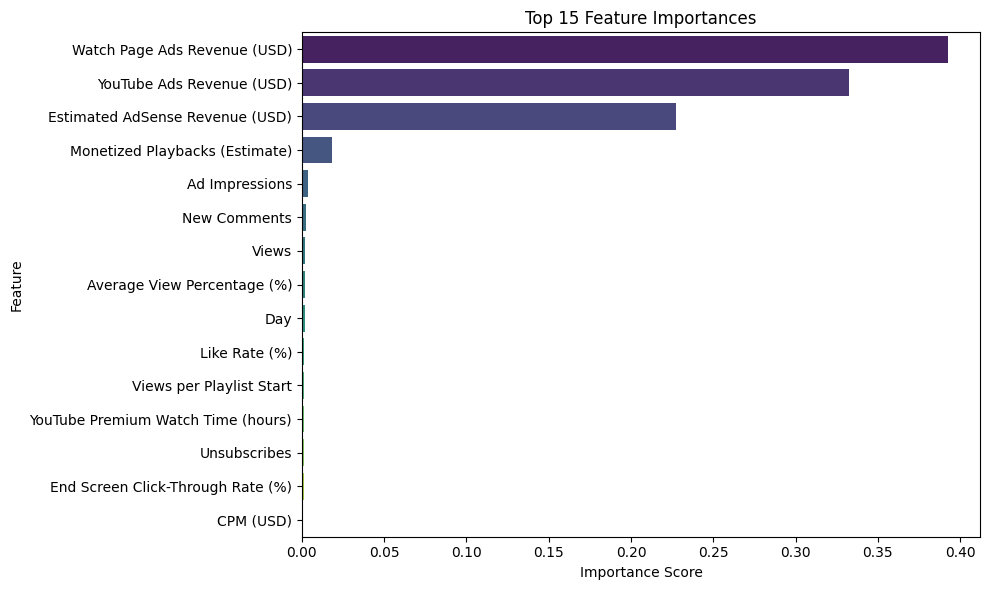

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
data = pd.read_csv('youtube_channel_real.csv')
target_column = 'Estimated Revenue (USD)'

# 1. Prepare features and target
features = data.drop(['ID', 'Video Publish Time', target_column], axis=1).columns.tolist()
X = data[features]
y = data[target_column]

# 2. Encode categorical columns
X_encoded = pd.get_dummies(X)
features = X_encoded.columns.tolist()  # Update feature list

# 3. Split, train, feature importances
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort and select top N features
N = 15  # Show top 15 most important features (change as needed)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(N)

# Plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")
plt.title(f"Top {N} Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:

# Clean column names (strip spaces and standardize)
data.columns = data.columns.str.strip()

# Define features and target (edit these if your CSV uses slightly different names)
features = ['Views', 'Subscribers', 'Likes', 'Shares', 'New Comments', 'Average View Percentage (%)']
target = 'Estimated Revenue (USD)'

# Check if all columns exist
missing_features = [col for col in features if col not in data.columns]
missing_target = target not in data.columns

if missing_features or missing_target:
    print("Available columns:", list(data.columns))
    if missing_features:
        print("Missing feature columns:", missing_features)
    if missing_target:
        print(f"Missing target column: {target}")
    raise ValueError("One or more required columns are missing. Please check your CSV file and column names.")

# Select features and target
X = data[features]
y = data[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Data split successful.")

Data split successful.


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = data.drop(['Views', 'Subscribers', 'Likes', 'Shares', 'New Comments', 'Average View Percentage (%)'], axis=1)
y = data['Estimated Revenue (USD)']






In [ ]:
#For demonstration, let's create synthetic data:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#Predict on test data
y_pred = model.predict(X_test)

In [ ]:
#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 2621.42
R-squared: 0.84


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, preds))


Mean Absolute Error: 40.14076474366087
